In [29]:
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv("/kaggle/input/naveen/PRSA_data_2010.1.1-2014.12.31.csv")

In [31]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [33]:
df.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [34]:
df.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
43819    False
43820    False
43821    False
43822    False
43823    False
Length: 43824, dtype: bool>

## Basic Data Preparation

In [35]:
from pandas import read_csv
from datetime import datetime

In [36]:
# load data

df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

df.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

df.set_index('datetime',inplace=True)

In [37]:
print(df.columns)
print("Number of columns in DataFrame:", len(df.columns))

Index(['No', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir'], dtype='object')
Number of columns in DataFrame: 9


In [38]:
df.drop(columns=['No'], inplace=True)

In [57]:
df.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']

In [58]:
df['pollution']= df['pollution'].fillna(0)

/tmp/ipykernel_33/600322610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pollution']= df['pollution'].fillna(0)


In [59]:
df['pollution']

datetime
2010-01-02 00:00:00    129.0
2010-01-02 01:00:00    148.0
2010-01-02 02:00:00    159.0
2010-01-02 03:00:00    181.0
2010-01-02 04:00:00    138.0
                       ...  
2014-12-31 19:00:00      8.0
2014-12-31 20:00:00     10.0
2014-12-31 21:00:00     10.0
2014-12-31 22:00:00      8.0
2014-12-31 23:00:00     12.0
Name: pollution, Length: 43800, dtype: float64

In [60]:
# drop the first 24 hours
df = df[24:]

In [61]:
# summarize first 5 rows
print(df.head(5))

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
datetime                                                                      
2010-01-03 00:00:00       90.0   -7  -6.0  1027.0      SE    58.56     4     0
2010-01-03 01:00:00       63.0   -8  -6.0  1026.0      SE    61.69     5     0
2010-01-03 02:00:00       65.0   -8  -7.0  1026.0      SE    65.71     6     0
2010-01-03 03:00:00       55.0   -8  -7.0  1025.0      SE    68.84     7     0
2010-01-03 04:00:00       65.0   -8  -7.0  1024.0      SE    72.86     8     0


In [62]:
df.to_csv('pollution.csv')

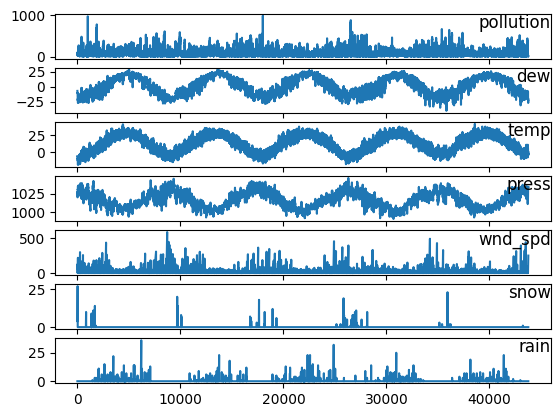

In [63]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

## LSTM Data Preparation

In [64]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [65]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    
    # Input sequence (t-n, ..., t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    # Forecast sequence (t, t+1, ..., t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    
    # Concatenate input and forecast sequences
    agg = concat(cols, axis=1)
    agg.columns = names
    
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg

In [66]:
# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.090543   0.485294   0.213115   0.654547   0.666667   0.099308   
2   0.063380   0.470588   0.213115   0.636364   0.666667   0.104657   
3   0.065392   0.470588   0.196721   0.636364   0.666667   0.111527   
4   0.055332   0.470588   0.196721   0.618183   0.666667   0.116876   
5   0.065392   0.470588   0.196721   0.600000   0.666667   0.123746   

   var7(t-1)  var8(t-1)   var1(t)  
1   0.148148        0.0  0.063380  
2   0.185185        0.0  0.065392  
3   0.222222        0.0  0.055332  
4   0.259259        0.0  0.065392  
5   0.296296        0.0  0.083501  


## Define and Fit Model

In [67]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

In [68]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [69]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 8) (8760,) (35015, 1, 8) (35015,)


In [70]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


122/122 - 3s - 23ms/step - loss: 0.0593 - val_loss: 0.0743
Epoch 2/50
122/122 - 2s - 13ms/step - loss: 0.0400 - val_loss: 0.0757
Epoch 3/50
122/122 - 1s - 7ms/step - loss: 0.0262 - val_loss: 0.0590
Epoch 4/50
122/122 - 1s - 7ms/step - loss: 0.0195 - val_loss: 0.0458
Epoch 5/50
122/122 - 1s - 7ms/step - loss: 0.0164 - val_loss: 0.0340
Epoch 6/50
122/122 - 1s - 7ms/step - loss: 0.0153 - val_loss: 0.0227
Epoch 7/50
122/122 - 1s - 7ms/step - loss: 0.0149 - val_loss: 0.0178
Epoch 8/50
122/122 - 1s - 7ms/step - loss: 0.0149 - val_loss: 0.0161
Epoch 9/50
122/122 - 1s - 7ms/step - loss: 0.0148 - val_loss: 0.0154
Epoch 10/50
122/122 - 1s - 11ms/step - loss: 0.0145 - val_loss: 0.0149
Epoch 11/50
122/122 - 1s - 10ms/step - loss: 0.0144 - val_loss: 0.0158
Epoch 12/50
122/122 - 1s - 7ms/step - loss: 0.0146 - val_loss: 0.0149
Epoch 13/50
122/122 - 1s - 7ms/step - loss: 0.0144 - val_loss: 0.0151
Epoch 14/50
122/122 - 1s - 7ms/step - loss: 0.0146 - val_loss: 0.0139
Epoch 15/50
122/122 - 1s - 11ms/step

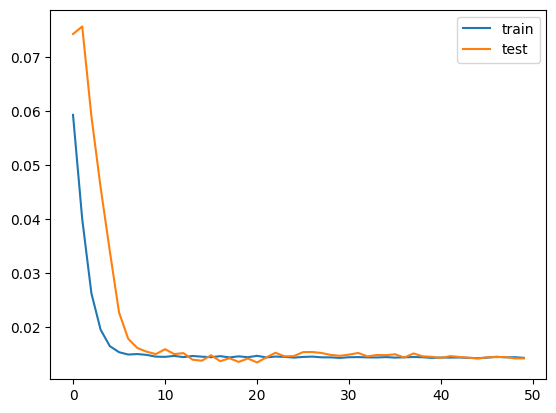

In [71]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## Evaluate Model

In [72]:
from numpy import concatenate
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

In [74]:
# Make a prediction
yhat = model.predict(test_X)

# Reshape test_X from 3D back to 2D for inverse scaling
test_X= test_X.reshape((test_X.shape[0], test_X.shape[2]))

yhat1 = model.predict(train_X)
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

# Invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)  # assuming '1:' is correct and corresponds to the rest of the features
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, 0]  # Assuming the first column is the predicted variable

# Invert scaling for actual values
test_y= test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]  # Assuming the first column is the actual variable


1095/1095 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [75]:
# invert scaling for forecast train
from numpy import concatenate
inv_yhat1 = concatenate((yhat1, train_X[:, 1:]), axis=1)
inv_yhat1 = scaler.inverse_transform(inv_yhat1)
inv_yhat1 = inv_yhat1[:,0]

In [76]:
# invert scaling for actual train
train_y = train_y.reshape((len(train_y), 1))
inv_y1 = concatenate((train_y, train_X[:, 1:]), axis=1)
inv_y1 = scaler.inverse_transform(inv_y1)
inv_y1 = inv_y1[:,0]

In [77]:
# calculate RMSE
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 26.806


In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_true contains the actual target values and y_pred contains the predicted values
mae = mean_absolute_error(inv_y, inv_yhat)
mse = mean_squared_error(inv_y, inv_yhat)
rmse = mean_squared_error(inv_y, inv_yhat, squared=False)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
accurcay = r2_score(inv_y, inv_yhat)
accurcay

Mean Absolute Error (MAE): 14.068751
Mean Squared Error (MSE): 718.53705
Root Mean Squared Error (RMSE): 26.805542


0.9152970639057798

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_true contains the actual target values and y_pred contains the predicted values
mae = mean_absolute_error(inv_y1, inv_yhat1)
mse = mean_squared_error(inv_y1, inv_yhat1)
rmse = mean_squared_error(inv_y1, inv_yhat1, squared=False)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
accurcay = r2_score(inv_y1, inv_yhat1)
accurcay

Mean Absolute Error (MAE): 14.754484
Mean Squared Error (MSE): 969.0135
Root Mean Squared Error (RMSE): 31.12898


0.8877294057048654